https://stackoverflow.com/questions/34933905/matplotlib-adding-subplots-to-a-subplot

https://stackoverflow.com/questions/43352931/matplotlib-subplot-imshow-plot

In [144]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numba
import scipy.signal as spsig

from mpl_toolkits.axes_grid1 import make_axes_locatable

# plt.style.use('seaborn-pastel')
plt.rcParams['font.family'] = 'sans-serif'
COLOR = 'k'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
plt.rcParams['axes.edgecolor'] = 'k'
SIZE = 15
plt.rcParams['font.size'] = SIZE
plt.rcParams['legend.fontsize'] = SIZE
plt.rcParams['figure.titlesize'] = SIZE
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 800
# plt.rcParams['image.cmap'] = 'coolwarm'
# plt.rcParams['image.cmap'] = 'jet'
# plt.rcParams['image.cmap'] = 'Greys'

# Sunset ColorMap

In [145]:
from matplotlib import colors
from matplotlib import cm

def inter_from_256(x):
    return np.interp(x=x,xp=[0,255],fp=[0,1])

cdict = {
    'red':((0.0, inter_from_256(255), inter_from_256(255)),
           (1/350 * 90, inter_from_256(0), inter_from_256(0)),
           (1/350 * 265, inter_from_256(230), inter_from_256(230)),
           (1/350 * 350, inter_from_256(255), inter_from_256(255))),
    'green':((0.0, inter_from_256(255), inter_from_256(255)),
             (1/350 * 90, inter_from_256(0), inter_from_256(0)),
             (1/350 * 265, inter_from_256(86), inter_from_256(86)),
             (1/350 * 350, inter_from_256(128), inter_from_256(128))),
    'blue': ((0.0, inter_from_256(255), inter_from_256(255)),
             (1/350 * 90, inter_from_256(128), inter_from_256(128)),
             (1/350 * 265, inter_from_256(102), inter_from_256(102)),
             (1/350 * 350, inter_from_256(0), inter_from_256(0))),
}

new_cmap = colors.LinearSegmentedColormap('new_cmap',segmentdata=cdict)

# complex square function

In [146]:
@numba.vectorize(
    [numba.float64(numba.complex128),
     numba.float32(numba.complex64)])
def abs2(x):

    return x.real**2. + x.imag**2.

In [147]:
I_randDir = np.load("/Users/tommychin/Documents/research/Smallwood_research/paper/RightProj7_28/I_randDir1e-3.npy")
I_randDir = np.sqrt(abs2(I_randDir))
I_randDir /= np.max(I_randDir)

# I_iso = np.load("/Users/tommychin/Documents/research/Smallwood_research/paper/SimpleProj/I_iso.npy")

I_iso = np.load("/Users/tommychin/Documents/research/Smallwood_research/paper/RightProj7_28/I_iso4.5e-4.npy")
I_iso = np.sqrt(abs2(I_iso))
I_iso /= np.max(I_iso)

I_uniDir = np.load("/Users/tommychin/Documents/research/Smallwood_research/paper/RightProj7_28/I_uniDir1e-3.npy")
I_uniDir = np.sqrt(abs2(I_uniDir))
I_uniDir /= np.max(I_uniDir)

# I_uniDir_p0 = np.load("/Users/tommychin/Documents/research/Smallwood_research/paper/SimpleProj/I_uniDir_p0.npy")

I_uniDir_p0 = np.load("/Users/tommychin/Documents/research/Smallwood_research/paper/RightProj7_28/I_uniDir_p01.5e-3.npy")
I_uniDir_p0 = np.sqrt(abs2(I_uniDir_p0))
I_uniDir_p0 /= np.max(I_uniDir_p0)

unstrained = np.load("/Users/tommychin/Documents/research/Smallwood_research/paper/SimpleProj/unstrained.npy")


databox = np.array([I_randDir, I_iso, I_uniDir, I_uniDir_p0])

In [148]:
np.shape(unstrained)

(500, 500)

In [149]:
res = 500

Delta_ZPL_0 = 406.83  # 406 THz  Meesala
lambda_SO_gs = 46e-3  # 46 GHz  Meesala
lambda_SO_es = 255e-3  # 255 GHz  Meesala

nu_t_min = Delta_ZPL_0-lambda_SO_es+lambda_SO_gs - 3
nu_t_max = Delta_ZPL_0-lambda_SO_es+lambda_SO_gs + 3

nu_t = np.linspace(nu_t_min, nu_t_max, res)
nu_tau = np.linspace(-nu_t_max, -nu_t_min, res)

minPlt = nu_t_min   # THz
maxPlt = nu_t_max

minInd_t = np.argmin(np.abs(nu_t-minPlt))
maxInd_t = np.argmin(np.abs(nu_t-maxPlt))

minInd_tau = np.argmin(np.abs(nu_tau+maxPlt))
maxInd_tau = np.argmin(np.abs(nu_tau+minPlt))

In [150]:
def findMax(I_random6_proj, ax):
    n = 30  # the larger n is, the smoother curve will be
    b = [1.0 / n] * n
    a = 1.

    I_random6_proj_fill_amp = spsig.filtfilt(b, a, I_random6_proj)
    
    colors =  plt.cm.tab20( np.arange(4).astype(int) )

    ax.plot(nu_t, I_random6_proj, c=colors[3])
    ax.plot(nu_t, I_random6_proj_fill_amp, c='C1',
             label='strained')  # smooth by filter
    
    HM_y = np.max(I_random6_proj_fill_amp)/2
    HMInd = np.argsort(np.abs(I_random6_proj_fill_amp - np.max(I_random6_proj_fill_amp)/2))[:2]
    
    ax.plot(nu_t[np.argmax(I_random6_proj_fill_amp)],
            np.max(I_random6_proj_fill_amp),
            "x",
            c='C2')
    ax.hlines(HM_y, nu_t[HMInd[0]], nu_t[HMInd[1]], colors='C2')
    ax.text(np.mean(nu_t[HMInd]), HM_y, f'{np.abs(nu_t[HMInd[1]] - nu_t[HMInd[0]]):.2f}', ha='center', va='top')


    return

In [151]:
def projPlot(DataBox=databox, 
             figure_size=(11, 14), 
             figure_shape=[2, 2], 
             share_x_axis=True, 
             share_y_axis=True, 
             shared_x_label=r'Third-order frequency, $\nu_t$ (THz)', 
             shared_x_label_x_position=0.5, 
             shared_x_label_y_position=0.09, 
             shared_y_label=r'First-order frequency, $\nu_\tau$ (THz)', 
             shared_y_label_x_position=0.04, 
             shared_y_label_y_position=0.5, 
             shared_title=None, 
             shared_title_x_position=0.515, 
             shared_title_y_position=0.93, 
             outer_hgap=0.005, 
             outer_vgap=0.05, 
             titles = [r'$\left |S_{randDir} (\nu_t, \nu_\tau) \right |$', 
              r'$\left |S_{iso} (\nu_t, \nu_\tau) \right |$', 
              r'$\left |S_{uniDir} (\nu_t, \nu_\tau) \right |$', 
              r'$\left |S_{uniDir_{p0}} (\nu_t, \nu_\tau) \right |$']
            ):

    fig = plt.figure(figsize=figure_size)

    outer = gridspec.GridSpec(figure_shape[0],  # row
                              figure_shape[1],  # column, 
                              wspace=outer_hgap, 
                              hspace=outer_vgap)

    unstrained_x = np.sum(unstrained, axis=0)
#     unstrained_y = np.sum(unstrained, axis=1)
    unstrained_x /= max(unstrained_x)
#     unstrained_y /= max(unstrained_y)


    for i in range(4):
        inner = gridspec.GridSpecFromSubplotSpec(1, 1,
                        subplot_spec=outer[i])

        ax = plt.Subplot(fig, inner[0])

        Z = DataBox[i]

        x = np.sum(Z, axis=0)
    #     y = np.sum(Z, axis=1)

        x /= max(x)
    #     y /= max(y)

        EXTENT=(minPlt, maxPlt, -maxPlt, -minPlt)
        im = ax.imshow(Z, origin='lower', extent=EXTENT, cmap=new_cmap)

        # create new axes on the right and on the bottom of the current axes.
        divider = make_axes_locatable(ax)
        axbottom = divider.append_axes("bottom", size="25%", pad=0.05, sharex=ax)
    #     axright = divider.append_axes("right", size="25%", pad=0.05, sharey=ax)

        label='arb. units'
        cax = divider.append_axes("right", size="5%", pad=0.05)
        cbar = fig.colorbar(im, cax=cax)

        axbottom.spines['top'].set_visible(False)
        axbottom.spines['right'].set_visible(False)


        if i < np.prod(figure_shape) - figure_shape[1]:
            
            axbottom.spines['bottom'].set_visible(False)
            axbottom.get_xaxis().set_visible(False)

    #         axright.get_xaxis().set_visible(False)

        ax.get_xaxis().set_visible(False)

        if i % figure_shape[1]:

            ax.get_yaxis().set_visible(False)
            axbottom.get_yaxis().set_visible(False)
            axbottom.spines['left'].set_visible(False)


            if label is not None:
                plt.ylabel(label)

        if (i+1) % figure_shape[1]:

            cax.set_visible(False)


        #plot to the new axes
        axbottom.plot(nu_t[minInd_t: maxInd_t+1], unstrained_x, label='unstrained')
        axbottom.plot(nu_t[minInd_t: maxInd_t+1], x)
        
        findMax(x, axbottom)

    #     axright.plot(unstrained_y, nu_tau[minInd_tau: maxInd_tau+1])
    #     axright.plot(y, nu_tau[minInd_tau: maxInd_tau+1])
    #     axright.get_yaxis().set_visible(False)

        ax.set_title(titles[i])
        if i==0:
            axbottom.legend(labelcolor='k', loc='upper left', fancybox=True, framealpha=0)


        if shared_title != None:  # shared x label
            fig.suptitle(x=shared_title_x_position,
                         y=shared_title_y_position,
                         t=shared_title,
                         ha='center',
                         size=1.5 * SIZE)

        if shared_x_label != None:  # shared x label
            fig.text(x=shared_x_label_x_position,
                     y=shared_x_label_y_position,
                     s=shared_x_label,
                     ha='center')

        if shared_y_label != None:  # shared y label
            fig.text(x=shared_y_label_x_position,
                     y=shared_y_label_y_position,
                     s=shared_y_label,
                     va='center',
                     rotation='vertical')

        #adjust margins
    #     axright.margins(y=0)
        axbottom.margins(x=0)

        fig.add_subplot(ax)

    plt.show()
    return fig

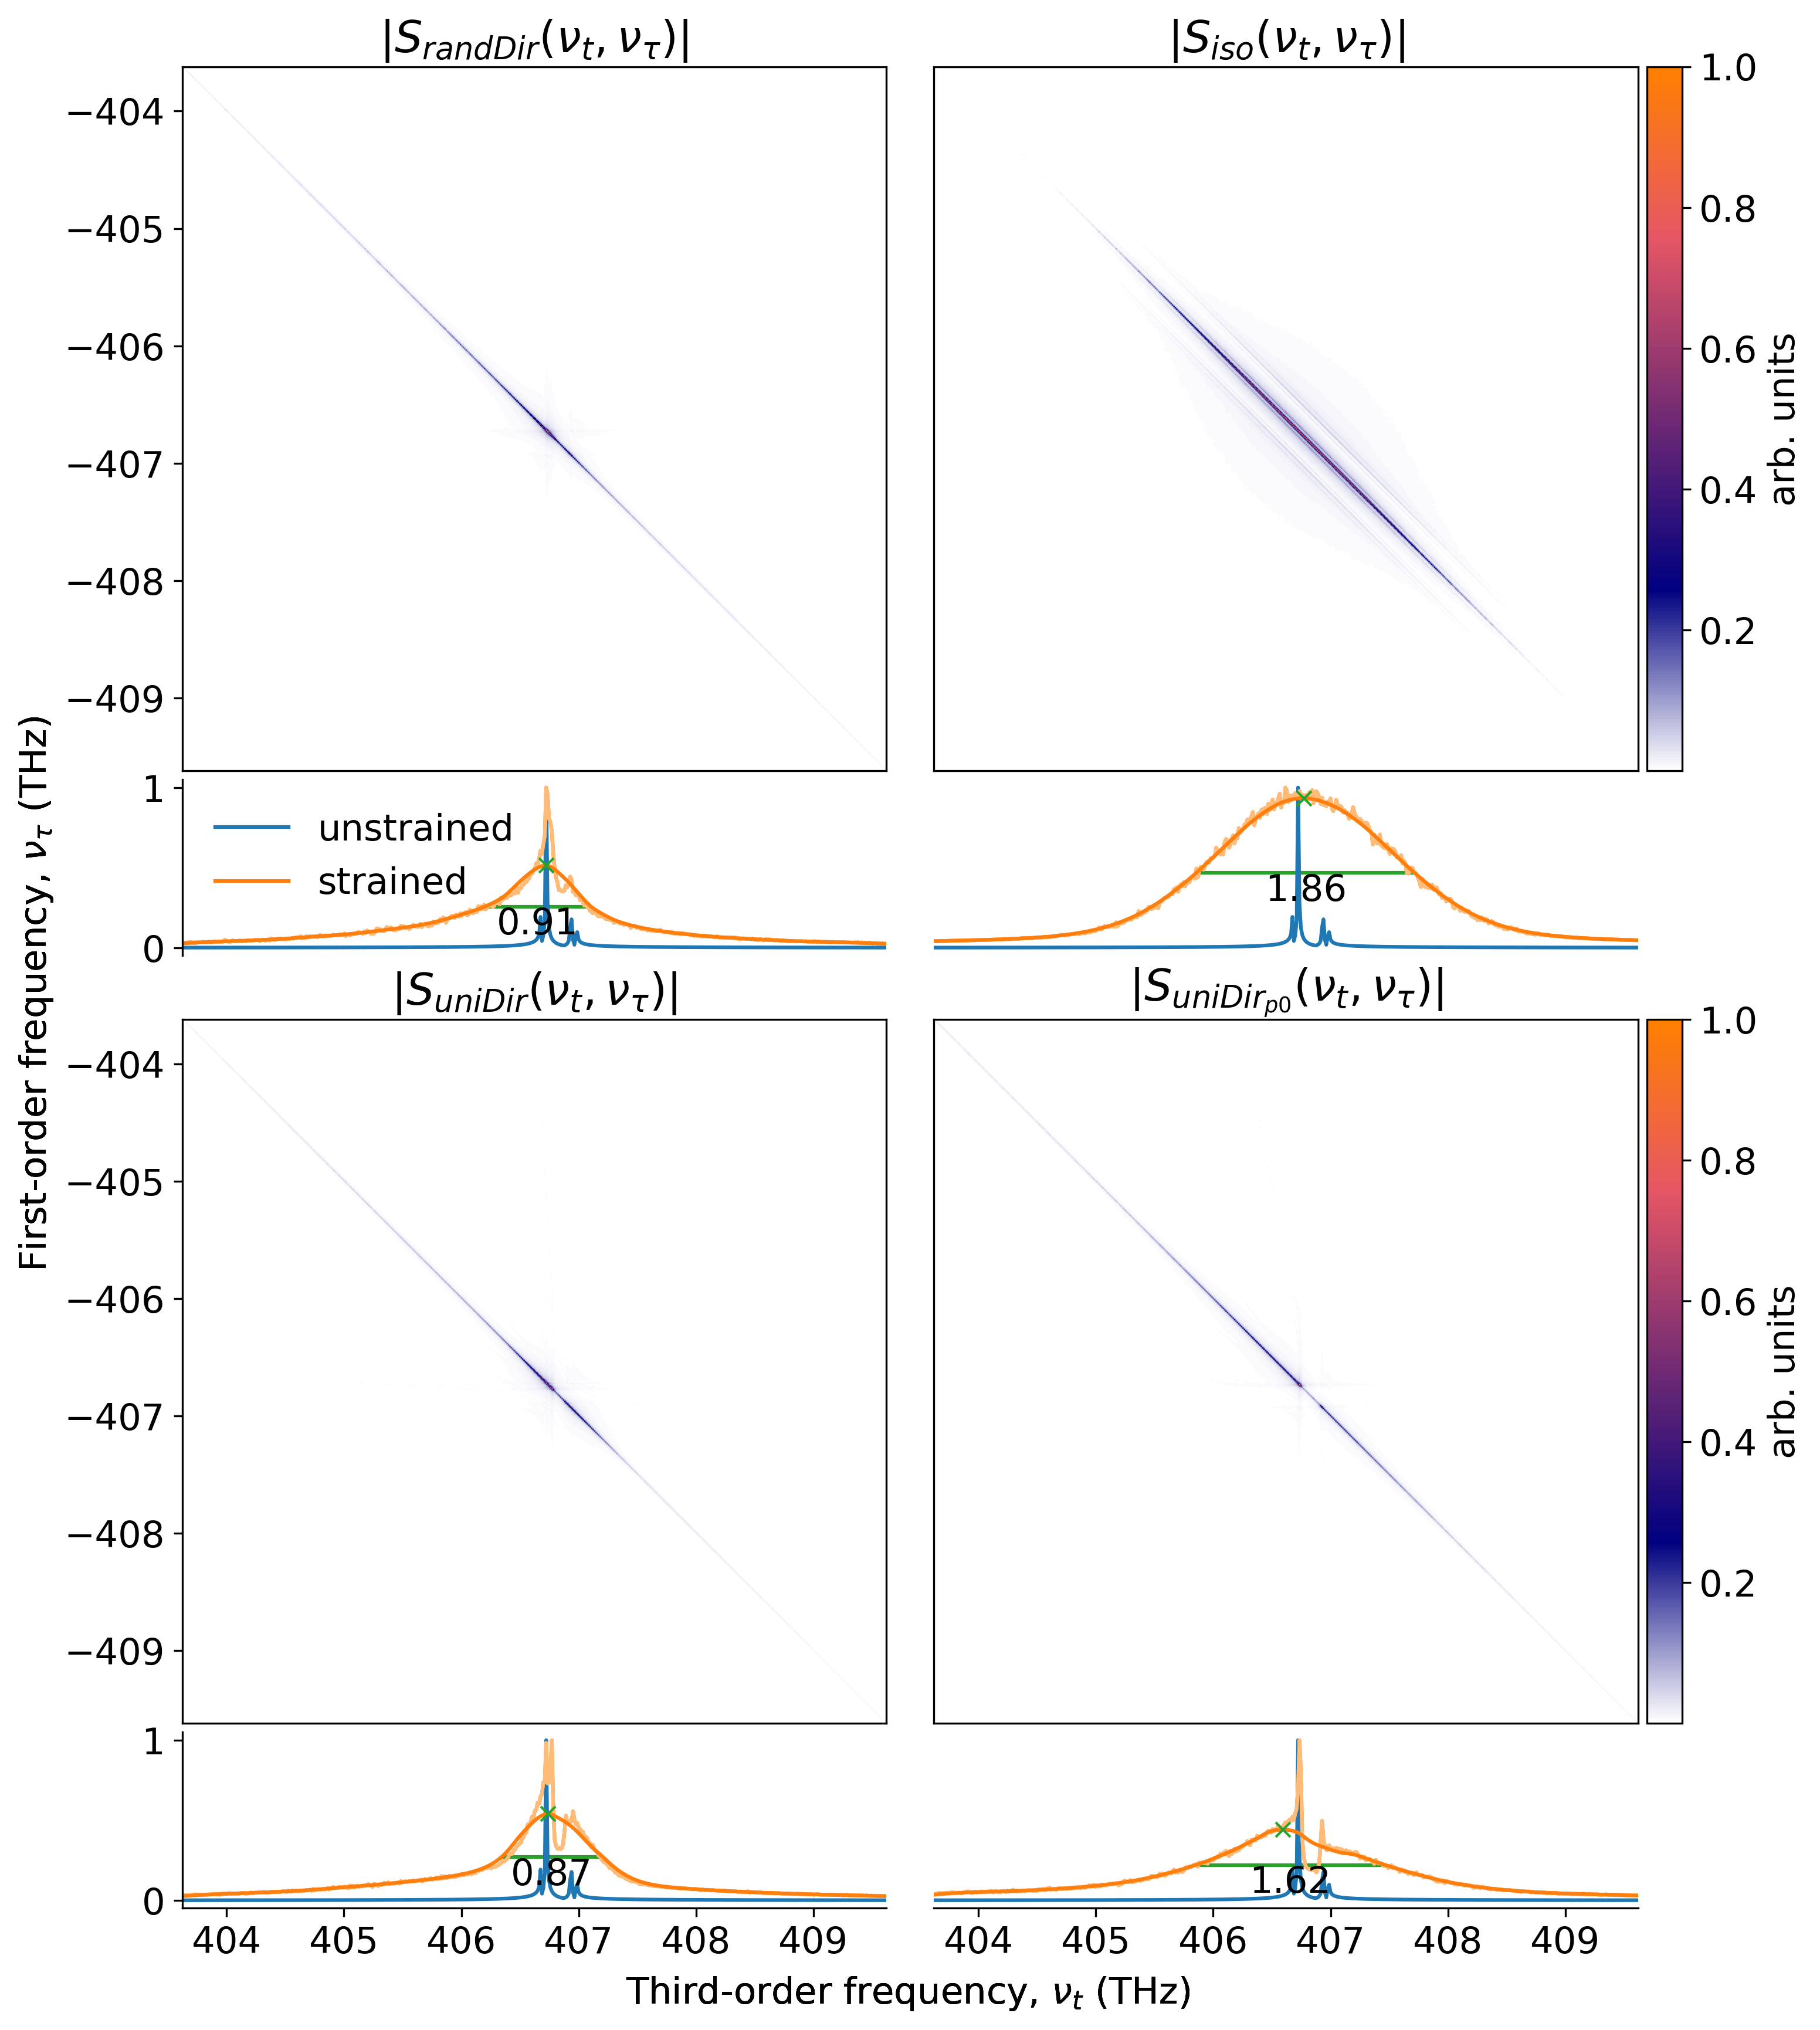

In [152]:
fig = projPlot()

fig.savefig("/Users/tommychin/Documents/research/Smallwood_research/paper/RightProj/OtherModels2.eps", 
                 format='eps', 
                 bbox_inches='tight')

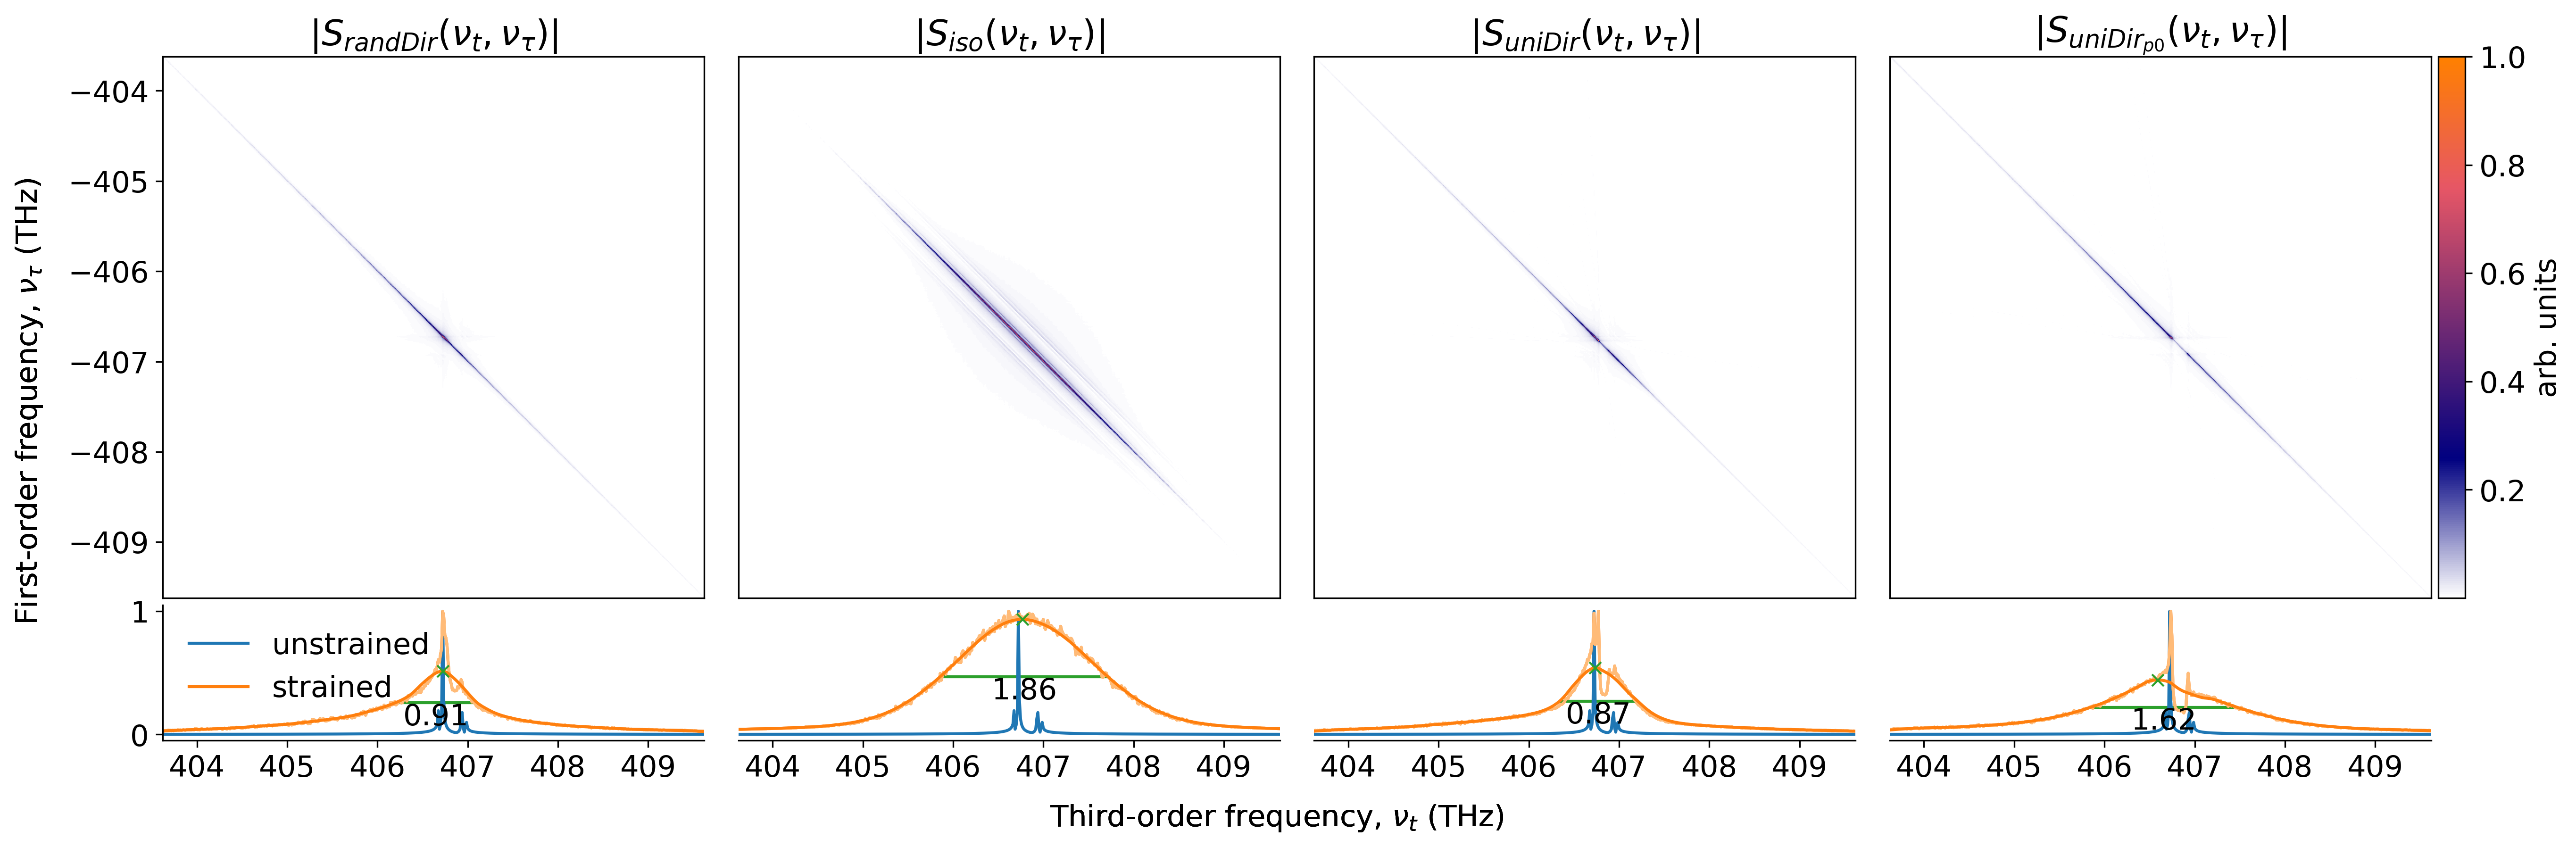

In [153]:
fig2 = projPlot(figure_shape=[1, 4],
                figure_size=(21, 8),
                shared_x_label_y_position=0.125, 
                shared_y_label_x_position=0.075,
                outer_hgap=0.0001,
)

fig2.savefig("/Users/tommychin/Documents/research/Smallwood_research/paper/RightProj/OtherModels3.eps", 
                 format='eps', 
                 bbox_inches='tight')